# Programmier-Workshop der jDPG

In diesem Kurs wird erklärt, wie Simulationen in Python umgesetzt werden können mithilfe des `matplotlib.animation` Packages. 
All das wird im Rahmen von physikalischen Beispielen erarbeitet und das Ziel ist über einen langfristigen Kurs verschiedenste Modelle und Simulationen umzusetzen.

In diesem ersten Teil des Workshops wird die Animationsfunktion `FuncAnimation` eingeführt und erklärt.
Anschließend werden kleine Beispiele präsentiert und ganz am Ende soll eine Aufgabe selbstständig in kleinen Gruppen gelöst werden.

Voraussetzung für die Teilnahme an diesem Workshop ist lediglich das Verständnis von grundlegenden physikalischen Prozessen und Grundkentnissen in den Python Packages `numpy` und `matplotlib` und ein wenig mit dem Umgang von `Jupyter Notebooks`, wenn möglich. 
Es wird empfohlen [Anaconda](https://www.anaconda.com/products/individual) für das jeweilige Betriebssystem zu installieren. In diesem Data Science Paket sind alle nötigen Libraries enthalten. 

Um [Jupyter Notebooks](https://jupyter.readthedocs.io/en/latest/) zu starten muss nach der Installation von Anaconda lediglich eine Python Umgebung gestartet werden und der Befehl `jupyter notebook` eingegeben werden. Mehr dazu findet Ihr in der verlinkten Dokumentation.

Als letztes braucht brauchen wir eine Möglichkeit uns den Output der Videos anschauen zu können. 
In Jupyter ist dies leider nicht ohne weiteres möglich. Ein Projekt namens [FFmpeg](https://ffmpeg.org/download.html) beinhaltet Programme und Bibliotheken um dies zu tun. Bittet ladet euch dieses herunter und installiert es.

Jetzt kann es los gehen.

## Erste Schritte

Als erstes müssen alle Libraries etc., die wir benötigen, geladen werden.
Das ist das `matplotlib.pyplot` Matplotlib Interface, das standardmäßig mit `plt` abgekürzt wird, sowie die Bibliothek `numpy` als `np`.
Außerdem benötigen wir zur Darstellung unserer Plots das Package `display` aus der Bibliothek `IPython` des iPython Projekts.
Zu guter letzt laden wir auch hier schon mal die Klasse `FuncAnimation` aus dem Package `matplotlib.animation`.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython import display

Als erstes Beispiel schauen wir uns noch einmal an, wie man einfache Plots erstellt.
Das Semicolon unterdrückt hier (Eigenheit von `Jupyter`) den Output unserer Plot Funktion, den wir noch nicht brauchen.
In Jupyter wird die `plt.show()` Funktion automatisch aufgerufen.

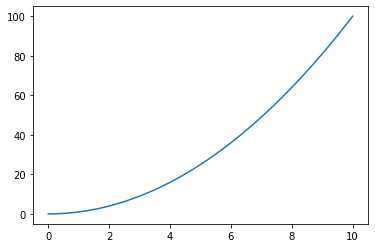

In [2]:
x = np.linspace(0,10,100)
y = x**2
plt.plot(x,y);

Am Anfang wird eine `figure`, die wir `figure_1` nennen, erstellt, auf der unser Plot gezeigt werden kann. 
Ein Subplot `ax_1` wird auf der `figure` erstellt mit `figure_1.add_subplot()`.
Anschließend wird ein leerer Plot mit der Funktion `ax.plot([])` erstellt. 
Jetzt schauen wir uns an, woraus dieses Plot-Objekt besteht. Die Funktion `plt.close()` unterdrückt die Ausgabe des Plot, da sie ja sonst in `Jupyter` standardmäßig angezeigt werden.

In [3]:
figure_1 = plt.figure()
ax_1 = figure_1.add_subplot()
ax_1.set_xlim(0,10)
ax_1.set_ylim(0,100)
plot_1 = ax_1.plot([])
plt.close()
print(f" Die Ausgabe ist eine Liste von Objekten: {plot_1}.\n \
Diese Liste beinhaltet nur ein Objekt, nämlich ein {plot_1[0]} Objekt.")


 Die Ausgabe ist eine Liste von Objekten: [<matplotlib.lines.Line2D object at 0x7fbcb361c810>].
 Diese Liste beinhaltet nur ein Objekt, nämlich ein Line2D(_line0) Objekt.


Die Ausgabe ist ein `matplotlib.lines.Line2D` Objekt an einem bestimmten Speicherplatz. 
Dieses Objekt können wir nun manipulieren.

Wir nennen dieses Line2D Objekt von `plot_1` hier `line_1`.
Es ist zu erkennen, dass wenn wir uns die `figure_1` Anzeigen lassen, dass wir immer noch unsere `default` figure haben, die leer ist.

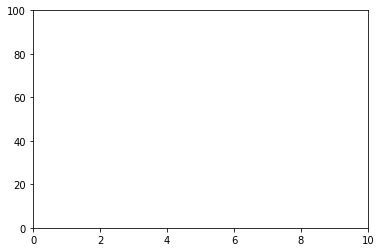

In [4]:
line_1 = plot_1[0]
figure_1

Mit dem Befehl `set_data` manipulieren wir unser Line-Objekt und können ihm z.B. die $x$- und $y$-Werte von oben geben.

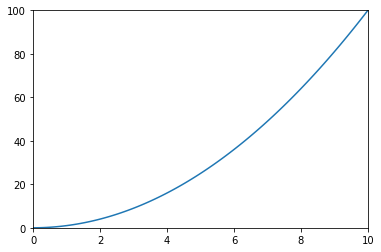

In [5]:
line_1.set_data(x,y)
figure_1 

An diesem Punkt haben wir die Konzepte der `figure`-, des `plot`- und des `line`-Objektes verstanden.
Nun müssen wir dieses Wissen nutzen um eine erste Animation zu erstellen.

## Erste Animation

Das Klasse `FuncAnimation` wird genutzt um Animationen mit Matplotlib zu erstellen. 
Die Input Parameter sind unsere figure `figure_1` und eine Funktion `function` in der wir unser Line2D Objekt `line_1` manipulieren können.
Die `FuncAnimation` Klasse erzeugt ein Video aus mehreren einzelnen Plots. Jeder Plot entspricht einem so genannten Frame. Ein Frame ist eines der Bilder eines Videos, das am Ende aus ganz vielen einzelnen Frames erzeugt wird.

Die Funktion `function` bekommt als Parameter den Wert des jeweiligen Frames `frame` mit. Diese sind Integer von $0$ bis $n$. 

Hier ein Beispiel einer Funktion, die eine Parabel nach und nach erzeugt.
Beim ersten Plot ist `x` Array als $x = [0]$ beim zweiten Plot ist $x = [0,1]$ und so weiter. 
Damit ergibt sich dann für 10 frames die Parabel so wie wir sie bisher gesehen haben.

In [6]:
def function(frame):
    x = np.linspace(0, frame, 1000)
    y = x**2
    line_1.set_data(x, y)

Jetzt erzeugen wir ein Objekt der Animationsklasse und nennen es `anim`. 
Wir geben dem Objekt die `figure_1`, die Funktion `function`, die Anzahl der Frames, $10$, mit und sagen, dass jeder Frame für $100$ ms eingeblendet werden soll. Somit entsteht ein Video, das eine Sekunde lang ist.

In [7]:
anim = FuncAnimation(figure_1, function, frames = 10, interval = 100)

Als letztes muss das Video aufgerufen werden.
Mit der Funktion `anim.to_html5_video()` convertieren wir das `FuncAnimation` Objekt in ein HTML Video. 
Mit der `display` Funktion der `IPython` Bibliothek können wir dieses Video einlesen via `display.HTML(video)` und abspielen mit `display.display(html)`.

In [8]:
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Somit haben wir unsere erste kleine Animation erzeugt.

# Zwei weitere Beispiele

Wir haben nun das Framework um schnell und einfach solche Simulationen zu erstellen. Nun geht es daran die einzelnen Bereiche besser zu verstehen und zu lernen, wie sie modifiziert werden können.

Dafür schauen wir uns als erstes ein weiteres Beispiel an mit einer anderen Funktion.

In [9]:
figure_2 = plt.figure()
ax_2 = figure_2.add_subplot()
ax_2.set_xlim(0,3*np.pi)
ax_2.set_ylim(-1.2,1.2)
plot_2 = ax_2.plot([])
plt.close()
line_2 = plot_2[0]

Soweit ist alles wie zuvor. Hier ändern wir jetzt die Funktion. 
Wir eine Bewegung simulieren auf einem festen $x$-Interval. Wir definieren $x$ im Bereich von $0$ bis $3\pi$ und lassen den $y$-Wert dann durchlaufen von $0$ bis zum Maximalwert der Frames, den wir hier auf $100$ setzen.

In [10]:
x = np.linspace(0,3*np.pi,1000)
def function(frame):
    y = np.sin(x +  2*np.pi*frame/100)
    line_2.set_data(x,y)

In [11]:
anim = FuncAnimation(figure_2, function, frames = 100, interval = 20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

Wie wir sehen, bewegt sich der Sinus nun durch das Bild. Man kann also mit der richtigen Funktion auch eine "Bewegung" erzeugen. Ein letztes Beispiel und dann geht es auch schon an die Aufgabe.

In diesem Beispiel wollen wir einen simplen Sekundenzeiger erzeugen. Dafür muss die default Größe unserer figure auf eine Quadrat angepasst werden, damit die Länge von unserem Zeiger konstant bleibt. Ansonsten können einfach Polarkoordinaten genutzt werden um die Funktion zu realisieren. Die Framerate muss dabei natürlich auf ein Bild pro Sekunde geändert werden.

In [12]:
figure_3 = plt.figure(figsize=(5,5))
ax_3 = figure_3.add_subplot()
ax_3.set_xlim(-1.2,1.2)
ax_3.set_ylim(-1.2,1.2)
plot_3 = ax_3.plot([])
plt.close()
line_3 = plot_3[0]

In [13]:
def function(frame):
    x = np.array([0, 0.7*np.sin(2*np.pi*frame/60)])
    y = np.array([0, 0.7*np.cos(2*np.pi*frame/60)])
    line_3.set_data(x,y)

In [14]:
anim = FuncAnimation(figure_3, function, frames = 60, interval = 1000)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

Wir haben nun gelernt, wie man Animationen realisiert und wie man die Funktion nutzt, um bestimmte Beispiele zu realisieren. Im Folgenden soll dies in einer etwas komplexeren Aufgabe umgesetzt werden.

# Aufgabe 1

Die Aufgabe ist die folgenden simplen Simulationen von Massepunkten zu nutzen, um 
1. Ein Vielteilchen-System,
2. Abstoßung am Rand, 
3. Abstoßung untereinander zu simulieren.

Hier bewegt sich ein Teilchen auf einer Kreisbahn um ein Zentrum herum. 
`x_Ball` und `y_Ball` erzeugen/malen dabei das Teilchen.

In [15]:
figure = plt.figure(figsize=(5,5))
ax = figure.add_subplot()
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
plot = ax.plot([])
plt.close()
line = plot[0]

In [16]:
i = np.arange(0,501)
path = np.array([np.sin(2*np.pi*i/500), np.cos(2*np.pi*i/500)])

In [17]:
def function(frame):
    two_pi = np.linspace(0,2*np.pi, 1000)
    x_ball = path[0, frame] + 0.1*np.sin(two_pi)
    y_ball = path[1, frame] + 0.1*np.cos(two_pi)
    line.set_data(x_ball,y_ball)

In [18]:
anim = FuncAnimation(figure, function, frames = 500, interval = 30)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

In einer anderen Variante bewegt sich das Teilchen zufällig, also beschreibt eine Brownsche Bewegung.  

In [19]:
figure = plt.figure(figsize=(5,5))
ax = figure.add_subplot()
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
plot = ax.plot([])
plt.close()
line = plot[0]

In [20]:
step_size = 0.02
path = np.cumsum(np.random.choice([-1*step_size,1*step_size,0], (2,700)), axis=1)

In [21]:
def function(frame):
    two_pi = np.linspace(0,2*np.pi, 1000)
    x_ball = path[0, frame] + 0.1*np.sin(two_pi)
    y_ball = path[1, frame] + 0.1*np.cos(two_pi)
    line.set_data(x_ball,y_ball)

In [22]:
anim = FuncAnimation(figure, function, frames = 700, interval = 20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)